# **Escala y selección de características segun el tipo de datos** 

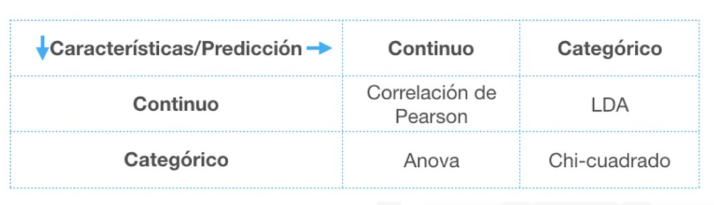

Estos son los modelos de machine learning que son sensibles al escalado de características:
* Linear and Logistic Regression
* Neural Networks
* Support Vector Machines
* KNN
* K-means clustering
* Linear Discriminant Analysis (LDA)
* Principal Component Analysis (PCA)

La información de este notebook se basa en el repositorio de Soledad Galli: https://github.com/solegalli/feature-engineering-for-machine-learning
Además del blog de Wei-Meng Lee en: https://towardsdatascience.com/statistics-in-python-using-anova-for-feature-selection-b4dc876ef4f0

## 1: Escala de características

In [46]:
#importamos las librerias de estadistica
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
#importamos las librerias para el feature selection
from sklearn.feature_selection import chi2 #CHI2
from sklearn.preprocessing import StandardScaler #NORMALIZATION
from sklearn.feature_selection import SelectKBest #ANOVA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis#LDA

### 1.1: Escala de datos continuos

In [3]:
#importamos el dataset 
from sklearn.datasets import load_boston
#Trabajamos con el dataser de Boston houses
boston_dataset = load_boston()
data = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
#Agregar la columna de la etiqueta
data['CLASS'] = boston_dataset.target
data.describe()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CLASS
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


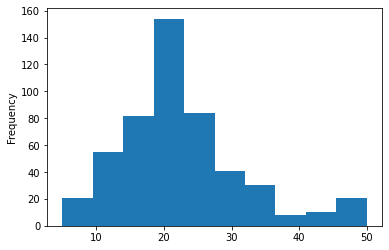

In [4]:
data['CLASS'].plot.hist()

Los datos de salida son continuos y están en el intérvalo del 5 al 50

1.1.1 Con output continua: Normalización

La normalización media implica centrar la variable en cero y volver a escalar al rango de valores. El procedimiento consiste en restar la media de cada observación y luego dividir por la diferencia entre el valor mínimo y máximo:

x_scaled = (x - x_mean) / ( x_max - x_min)

El resultado de la transformación anterior es una distribución que está centrada en 0, y sus valores mínimo y máximo están dentro del rango de -1 a 1. La forma de una distribución media normalizada será muy similar a la distribución original de la variable, pero la varianza puede cambiar, por lo que no es idéntica.

Nuevamente, esta técnica no normalizará la distribución de los datos, por lo tanto, si este es el resultado deseado, debemos implementar cualquiera de las técnicas discutidas en la sección 7 del curso.

En pocas palabras, normalización media:

* centra la media en 0
* la variación será diferente
* puede alterar la forma de la distribución original
* los valores mínimo y máximo exprimidos entre -1 y 1
* conserva valores atípicos

Bueno para algoritmos que requieren funciones centradas en cero.

In [5]:
# Separamos los datos de entrenamiento de los de test
X_train, X_test, y_train, y_test = train_test_split(data.drop('CLASS', axis=1),
                                                    data['CLASS'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

In [6]:
# Hallamos la media de los datos de entrenamiento
means = X_train.mean(axis=0)
means

CRIM         3.358284
ZN          11.809322
INDUS       11.078757
CHAS         0.064972
NOX          0.556098
RM           6.308427
AGE         68.994068
DIS          3.762459
RAD          9.353107
TAX        401.782486
PTRATIO     18.473446
B          360.601186
LSTAT       12.440650
dtype: float64

In [55]:
#identificamos el valor min y max de los datos de entrenmiento
ranges = X_train.max(axis=0)-X_train.min(axis=0)
ranges

CRIM        88.96988
ZN         100.00000
INDUS       27.28000
CHAS         1.00000
NOX          0.48600
RM           5.21900
AGE         97.10000
DIS         10.95230
RAD         23.00000
TAX        524.00000
PTRATIO      9.40000
B          396.58000
LSTAT       35.25000
dtype: float64

In [8]:
# Ahora normalizamos:
X_train_scaled = (X_train - means) / ranges
X_test_scaled = (X_test - means) / ranges

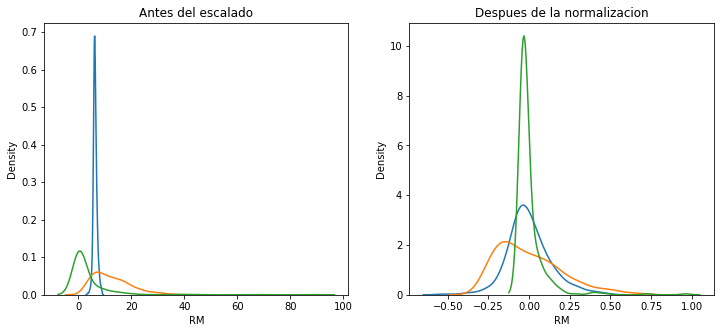

In [56]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Antes
ax1.set_title('Antes del escalado')
sns.kdeplot(X_train['RM'], ax=ax1)
sns.kdeplot(X_train['LSTAT'], ax=ax1)
sns.kdeplot(X_train['CRIM'], ax=ax1)

# Despues
ax2.set_title('Despues de la normalizacion')
sns.kdeplot(X_train_scaled['RM'], ax=ax2)
sns.kdeplot(X_train_scaled['LSTAT'], ax=ax2)
sns.kdeplot(X_train_scaled['CRIM'], ax=ax2)
plt.show()

In [57]:
np.round(X_train_scaled.describe(include="all"), 1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0
mean,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0
std,0.1,0.2,0.3,0.2,0.2,0.1,0.3,0.2,0.4,0.3,0.2,0.2,0.2
min,-0.0,-0.1,-0.4,-0.1,-0.4,-0.5,-0.7,-0.2,-0.4,-0.4,-0.6,-0.9,-0.3
25%,-0.0,-0.1,-0.2,-0.1,-0.2,-0.1,-0.2,-0.2,-0.2,-0.2,-0.1,0.0,-0.2
50%,-0.0,-0.1,-0.1,-0.1,-0.0,-0.0,0.1,-0.0,-0.2,-0.2,0.1,0.1,-0.0
75%,-0.0,0.1,0.3,-0.1,0.2,0.1,0.3,0.1,0.6,0.5,0.2,0.1,0.1
max,1.0,0.9,0.6,0.9,0.6,0.5,0.3,0.8,0.6,0.6,0.4,0.1,0.7


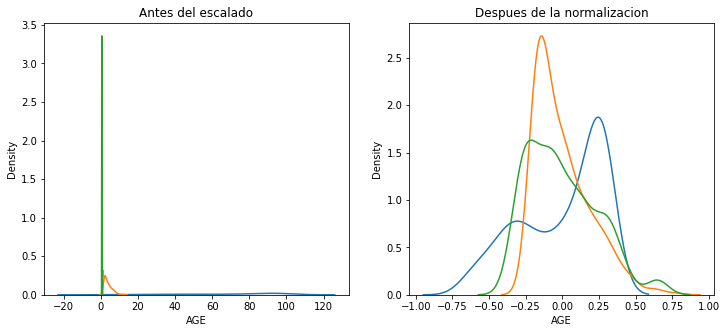

In [60]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Antes del escalado')
sns.kdeplot(X_train['AGE'], ax=ax1)
sns.kdeplot(X_train['DIS'], ax=ax1)
sns.kdeplot(X_train['NOX'], ax=ax1)

# after scaling
ax2.set_title('Despues de la normalizacion')
sns.kdeplot(X_train_scaled['AGE'], ax=ax2)
sns.kdeplot(X_train_scaled['DIS'], ax=ax2)
sns.kdeplot(X_train_scaled['NOX'], ax=ax2)
plt.show()

Compare estos gráficos con los derivados por estandarización en el cuaderno anterior para comprender mejor cómo estos procedimientos no son idénticos.


1.1.2 Con output categórica: LDA

In [44]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
X.shape, y.shape

((150, 4), (150,))

In [61]:
lda=LinearDiscriminantAnalysis(n_components=2)
X_lda=lda.fit_transform(X,y)
X.shape
# Reducimos de 4 dimensiones a 2
print('Número Original de características:', X.shape)
print('Número reducido de características:', X_lda.shape)

Número Original de características: (442, 10)
Número reducido de características: (442, 2)


### 1.2 Escala de datos categóricos

1.2.1 Con output continua ANOVA

In [53]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
X.shape, y.shape

((442, 10), (442,))

In [62]:
ANOVA_selector = SelectKBest(f_classif, k=2)
X_kbest = ANOVA_selector.fit_transform(X, y)
print('Número Original de características:', X.shape)
print('Número reducido de características:', X_kbest.shape)

Número Original de características: (442, 10)
Número reducido de características: (442, 2)


1.2.2 Con output catergórica : Chi cuadrado

In [24]:
from sklearn import datasets
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

In [64]:
wine = datasets.load_wine()

X = wine.data
print(X)
y = wine.target
print(y)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [65]:
chi2_selector = SelectKBest(chi2, k=2)
X_kbest = chi2_selector.fit_transform(X, y)
print(X_kbest)
print('Número Original de características:', X.shape)
print('Número reducido de características:', X_kbest.shape)

[[5.640000e+00 1.065000e+03]
 [4.380000e+00 1.050000e+03]
 [5.680000e+00 1.185000e+03]
 [7.800000e+00 1.480000e+03]
 [4.320000e+00 7.350000e+02]
 [6.750000e+00 1.450000e+03]
 [5.250000e+00 1.290000e+03]
 [5.050000e+00 1.295000e+03]
 [5.200000e+00 1.045000e+03]
 [7.220000e+00 1.045000e+03]
 [5.750000e+00 1.510000e+03]
 [5.000000e+00 1.280000e+03]
 [5.600000e+00 1.320000e+03]
 [5.400000e+00 1.150000e+03]
 [7.500000e+00 1.547000e+03]
 [7.300000e+00 1.310000e+03]
 [6.200000e+00 1.280000e+03]
 [6.600000e+00 1.130000e+03]
 [8.700000e+00 1.680000e+03]
 [5.100000e+00 8.450000e+02]
 [5.650000e+00 7.800000e+02]
 [4.500000e+00 7.700000e+02]
 [3.800000e+00 1.035000e+03]
 [3.930000e+00 1.015000e+03]
 [3.520000e+00 8.450000e+02]
 [3.580000e+00 8.300000e+02]
 [4.800000e+00 1.195000e+03]
 [3.950000e+00 1.285000e+03]
 [4.500000e+00 9.150000e+02]
 [4.700000e+00 1.035000e+03]
 [5.700000e+00 1.285000e+03]
 [6.900000e+00 1.515000e+03]
 [3.840000e+00 9.900000e+02]
 [5.400000e+00 1.235000e+03]
 [4.200000e+00

https://towardsdatascience.com/chi-square-test-for-feature-selection-in-machine-learning-206b1f0b8223
https://towardsdatascience.com/statistics-in-python-using-anova-for-feature-selection-b4dc876ef4f0
https://machinelearningmastery.com/linear-discriminant-analysis-for-dimensionality-reduction-in-python/